# 评估指标与评分

到目前为止，我们使用精度(正确分类的样本所占的比例)来评估分类性能，使用R^2来评估回归性能。但是，总结监督模型在给定数据集上的表现行多种方法,这两个指标只是 其中两种。在实践中，这些评估指标可能不适用于你的应用。在选择模型与调参时，选择 正确的指标是很重要的。

## 1.牢记最终目标

在选择指标时，你应该始终牢记机器学习应用的最终目标。在实践中，我们通常不仅对精确的预测感兴趣，还希望将这些预测结果用于更大的决策过程。在选择机器学习指标之前，你应该考虑应用的高级目标，这通常被称为**商业指标**(business metric)。对于一个机器学习应用，选择特定算法的结果被称为**商业影响**(business impact)，高级目标可能是避 免交通事故或者减少入院人数，也可能是吸引更多的网站用户或者让用户在你的商店中花更多的钱。在选择模型或调参时，你应该选择对商业指标具有最大正面影响的模型或参数值。这通常是很难的，因为要想评估某个模型的商业影响.可能需要将它放在真实的生产环境中。

开发的初期阶段调参，仅为了测试就将模型投入生产环境往往是不可行的，因为可能涉及很高的商业风险或个人风险。想象一下，为了测试无人驾驶汽车的行人避让能力，没有事先验证就让它直接上路。如果模型很糟糕的话，行人就会遇到麻烦！因此，我们通常需要找到某种替代的评估程序，使用一种更容易计算的评估指标。例如，我们可以测试对行人和非行人的图片进行分类并测量精度。清记住，这只是一种替代方法，找到与原始商业目标最接近的可评估的指标也很有用。应尽可能使用这个最接近的指标来进行模型评估与选择。评估的结果可能不是一个数字—— 算法的结果可能是顾客多了 10% ,但每位顾客的花费减少了 15%，—— 但它应该给出选择一个模型而不选另一个所造成的预期商业影响。

##  2. 二分类指标

分类可能是实践中最常见的机器学习应用，也是概念最简单的应用。但是，即使是评估这个简单任务也仍行一些注意事项.在深入研究替代指标之前,我们先看测量精度可能会如何误导我们。对于二分类问题.我们通常会说**正类**(positive class)和**反类**(negative class)，而正类是我们要寻找的类。 

### 1 .错误类型

通常来说，精度并不能很好地度量预测性能，因为我们所犯错误的数量并不包含我们感兴趣的所有信息。想象一个应用.利用自动化测来筛查癌症的早期发现，如果测试结果为阴性，那么认为患者是健康的,而如果测试结果为阳性,患者则需要接受额外的筛查，这里我们将阳性测试结果(表示患有癌症)称为正类.将阴性测试结果称为反类。我们不能假设模型永远是完美的，它也会犯错。对于任何应用而言，我们都需要问问自己，这些错误在现实世界中可能有什么后果。

一种可能的错误是健康的患者被诊断为阳性，导致需要进行额外的测试。这给患者带来了一些费用支出和不便(可能还有精神上的苦)。错误的阳性预测叫作**假正例**(false positive)。另一种可能的饼误是患病的人被诊断为阴性，因而不会接受进一步的检查和治疗。未诊断出的癌症可能导致外重㈱健康问题,甚至可能致命。这种类型的错误(错误的阴性预测)叫作**假反例**(false negative)。在统计学中，假正例也叫作第一类错误(type Ⅰ error)， 假反例也叫作第二类错误(type II error)。我也将坚持使用“假正例"和“假反例" 的说法，因为它们的含义更加明确,也更好记。在癌症诊断的例子中，显然，我们希望尽量避免假反例，而假正例可以被看作是小麻烦。

虽然这是一个特别极端的例子，但假正例和假反例造成的结果很少相同。在商业应用中. 可以为两种类型的错误分配美元值，即用美元而不是精度来度量某个预测结果的错误。对于选择使用哪种模型的商业决策而言，这种方法研能更有意义。

### 2. 不平衡数据集

如果在两个类别中,一个类别的出现次数比另一个多很多，那么错误类别将发挥重要作用。这在实践中十分常见,一个很好的例子是点击(click-through)预测。其中每个数据点表示一个"印象" (impression)，即向用户展示的一个物项。这个物项可能是广告、相关的故事，或者是在社交媒体网站上关注的相关人员。目标是预测用户足否会点击看到的某个特定物项(表示他们感兴趣)。用户对互联网上显示的大多数内容(尤其是广告)都不会点击。你可能需要向用户展示100个广告或文章,他才会找到足够有趣的内容来点击查看，这样就会得到一个数据集，其中每99 个 “未点击"的数据点，才有一个"已点击"的数据点。换句话说，99%的样本属于“未点击"类别。这种一个类别比另一个类别出现次数多很多的数据集，通常叫作**不平衡数据集**(imbalanced dataset)或者**具有不平衡类别的数据集** (dataset with imbalanced classes)。在实际当中，不平撕数据才是常态，而数据中感兴趣事件的出现次数相同或相似的情况十分罕见。

现在假设你在构建一个在点击预测任务中精度达到99%的分类器。这告诉你什么？99%的精度听起来令人印象深刻，但是它并没有考虑类别不平衡。你不必构建机器学习模型,始终预测"未点击"就可以得到99%的精度。另一方而，即使是不平衡数据.精度达到99%的模型实际上也是相当不错的。但是,精度无法帮助我们区分不变的"未点击"模型与潜在的优秀模型。

In [15]:
# 为了便于说明,我们将digits数据集中的数字9与其他九个类别加以区分，从而创建一个 9:1的不平衡数据集

from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

我们可以使用DummyClassifier来始终预测多数类(这里是"非9 ")，以查看精度提供的信息量有多么少：

In [16]:
from sklearn.dummy import DummyClassifier
# 该分类器用作与其他更复杂的分类器进行比较的简单基线
import numpy as np
# “most_frequent”: 该方法始终返回传递给predict的观察到的参数中最常见的类标签。该方法返回匹配的 one-hot 编码向量
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


我们得到了接近90%的精度，却没有学到任何内容。这个结果可能看起来相当好，但请思考一会儿。想象一下，有人告拆你他们的模型精度达到90%。你可能会认为他们做得很好。但根据具体问题，也可能是仅预测了一个类别！我们将这个结果与使用一个真实分类器的结果进行对比：

In [17]:
from sklearn.tree import DecisionTreeClassifier  # 决策树
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


从精度来看，DecisionTreeClassifier仅比常数预测稍好一点。这可能表示我们使用 DecisionTreeClassifter的方法有误，也可能是因为精度实际上在这里不是一个很好的度量。

为了便于对比,我们再评估两个分类器, LogisticRegression与默认的DunnyClasstfier,其中后者进行随机预测，但预测类别的比例与训练集中的比例相同：

In [18]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(max_iter=1000, C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.90
logreg score: 0.98


显而易见，产生随机输出的虚拟分类器是所有分类器中最差的(精度最低)，而LogisticRegression则给出了非常好的结果。但是，即使是随机分类器也得到了超过80%的精度。这样很难判断哪些结果是真正有帮助的。这里的问题在于，要想对这种不平衡数据的预测性能进行量化，精度并不是一种合适的度量。在接下来的内容中，我们将探索在选 择模型方面能够提供更好指导的其他指标。我们特别希望有一个指标可以告诉我们，一个模型比 "最常见"预测(由 pred_most_frequent给出)或随机预测(由pred_diwiy给出)要好多少。如果我们用一个指标来评估模型，那么这个指标应该能够淘汰这些无意义的预测。

### 3. 混淆矩阵

对于二分类问题的评估结果，一种最全面的表示方法是使用混淆矩阵(confusion malrix)。我们利用confusion_matrix函数来检查上一节LogisticRegression的预测结果。我们已经将测试集上的预测结果保存在pred_logreg中：

In [5]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n {}".format(confusion))

Confusion matrix:
 [[402   1]
 [  6  41]]


confusion_matrix 的输出是一个2 x 2 数组，其中行对应于真实的类别,列对应于预测的类别。数组中每个元素给出属干该行对应类别(这里是 非9 和 9 ) 的样本被分类到该列对应类别中的数量



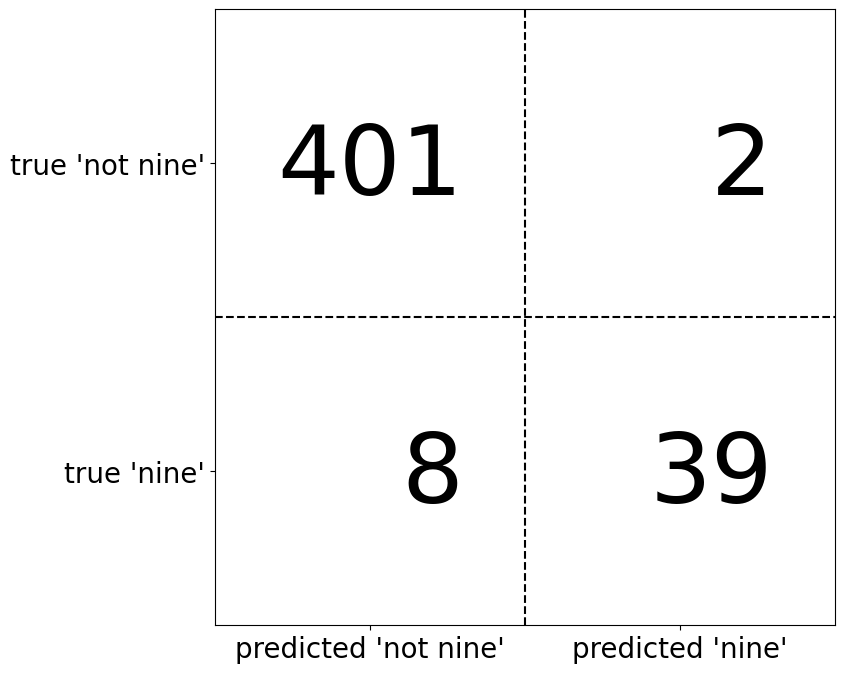

In [9]:
# "9与其他”分类任务的混淆矩阵
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()

混淆矩阵主对角线上的元素对应于正确的分类，而其他元素则告诉我们一个类别中有多少样本被错误地划分到其他类别中



如果我们将"9” 作为**正类**，那么就可以将混淆矩阵的元素与前面介绍过的**假正例**(fake positive)和**假反例**(false negative)两个术语联系起来。为了使图像更加完整，我们将**正类**中正确分类的样本称为**真正例**(true posilive),将反类中正确分类的样本称为**真反例** (true negative)。 这些术语通常缩写为FP、FN、TP和TN ,这样就可以得到下图对混淆矩阵的解释

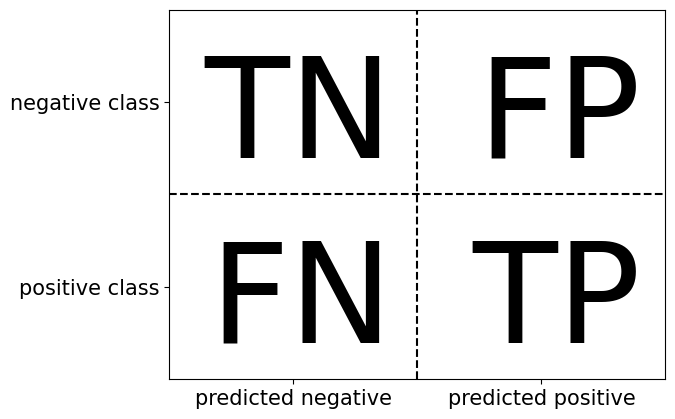

In [10]:
# 二分类混淆矩阵
mglearn.plots.plot_binary_confusion_matrix()

下面我们用混淆矩阵来比较前面拟合过的模型（两个虚拟模型、决策树和Logislic回归）:

In [19]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


观察混淆矩阵，很明显可以看出pred_most_frequent有问题，因为它总是预测同一个类别。另一方面，pred_dunmy的真正例0，特别是与假反例和假正例的数量相比--假正例的数量竟然比真正例正多! 决策树的预测比虚拟预测更有意义，即使二者精度几乎相同。最后，我们可以看到,Logistic回归在各方面都比pred_tree要好：它的真正例和真反例的数量更多，而假正例和假反例的数量更少。从这个对比中可以明确看出，只有决策树和Logistic回归给出了合理的结果，并且Logistic回归的效果全面好于决策树。但是，检查整个混淆矩阵有点麻烦，虽然我们通过观察矩阵的各个方面得到了很多深人见解，但是这个过程是人工完成的，也是非常定性的。

**矩阵中包含的信息:**

(1) 与精度的关系

一种总结混淆矩阵结果的方法 计算精度，其公式表达如下所示：

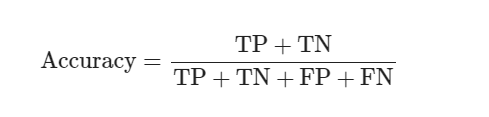

换句话说，精度是正确预测的数量（TP和TN）除以所有样本的数量（混淆矩阵中所有元素的总和）。

（2）准确率、召回率与f分数

总结混淆矩阵有几种方法，其中最常见的就是准确率和召回率。

**准确率**（precision） 度量的是被预测为正例的样本中有多少是真正的正例：

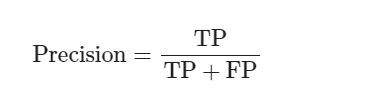

如果目标是限制假正例的数量，那么可以使用准确率作为性能指标。

模型不会产生很多假正例是很重要的，换句话说，模型的准确率很高。准确率也波称为**阳性预测值**(positive predictive value, PPV) 。 

另一方面，召回率(recall)度量的是正类样本中有多少被预测为正类:

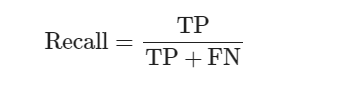

如果我们需要找出所有的iE类样本，即避免假反例是很重要的情况下，那么可以使用召回率作为性能指标。

召回率的其他名称有**灵敏度**(sensitivity)、**命中率**(hit rate)和**真正例率**(true positive rate, TPR)。 

在优化召回率与优化准确率之间需要折中。如果你预测所有样本都属于正类，那么可以轻松得到完美的召回率，没有假反例，也没有真反例。但是，将所有样本都预测为正类，将会得到许多假正例，因此准确率会很低。与之相反，如果你的模型只将一个最确定的数据点预测为正类，其他点部预测为反类，那么准确率将会很完美(假设这个数据点实际上就属于正类)，但是召回率会作常差。


虽然准确率和召回率是非常重要的度量，但是仅查看二者之一无法为你提供完整的图景。将两种度量进行汇总的一种方法是**f分数**(f-score)或**f度量**(f-measure)。它是准确率与召回率的调和平均：

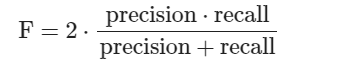

这一特定变体也被称为f分数(f-score)。由于同时考虑了准确率和召回率，所以它对于不平衡的二分类数据集来说是一种比精度更好的度量。我们对之前计算过的"9与其余”数据集的预测结果计算f分数。这里我们假定 9 类是正类(标记为True,其他样本被标记为False),因此正类是少数类：

In [24]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.3f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.3f}".format(f1_score(y_test, pred_dummy))) 
print("f1 score tree: {:.3f} ".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.3f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.000
f1 score dummy: 0.000
f1 score tree: 0.554 
f1 score logistic regression: 0.921


这里我们可以注意到两件事情。第一,我们从most_frequent的预测中得到一条错误信息, 因为预测的正类数量为0(使得户分数的分母为0)。第二，我们可以看到虚拟预测与决策树预测之间有很大的区别，而仅观察精度时二者的区别并不明显。利用了分数进行评估, 我们再次用一个数字总结了预测性能。但是，户分数似乎比精度更加符合我们对好模型的直觉。然而，f分数的一个缺点是比精度更加难以解释。

如果我们想要对准确率、召回率和f分数做一个更全面的总结,可以使用classification_report 这个很方便的函数，它可以同时计算这三个值，并以美观的格式打印出来：

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



D:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report 函数为每个类别(这里是True和 False)生成一行，并给出以该类别作为正类的准确率、召回率和f分数。前面我们假设较少的 9 类是正类。如果将正类改为"not nine"(非9 ) , 我们可以从classification_report 的输出中看出，利用 most_frequent模型得到的f分数为 0.94。此外，对于 "not nine" 类别，召回率是1 , 因 为我们将所有样本那分类为"nol nine"。f分数旁边的最后一列给出了每个类别的支持(support)，它表示的是在这个类别中真实样本的数量。 

分类报告的最后一行显示的是对应指标的宏平均和加权平均(按每个类别中的样本个数加权)。下面还有两个报告，一个是虚拟分类器的, 一个是Logistic回归的：

In [27]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



D:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



在查看报告时你可能注意到在虚拟模型与好模型之间的区别不再那么明显。选择哪个类作为正类对指标有很大影响。虽然在以"nine"类作为正类时虚拟分类的户分数是0.10 (对比Logistic回归的0.89)，而以"not nine "类作为正类时二者的户分数分别是0.91和0.99，两个结果看起来都很合理。不过同时查看所有数字可以给出非常准确的图像，我们可以清楚地看到Logistic回归模型的优势。 